<a href="https://colab.research.google.com/github/chathuray/Mini-Research-Project/blob/main/Auto_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/100
1/1 [==============================] - 1s 763ms/step - loss: 0.6932
Epoch 2/100
1/1 [==============================] - 0s 92ms/step - loss: 0.6921
Epoch 3/100
1/1 [==============================] - 0s 117ms/step - loss: 0.6791
Epoch 4/100
1/1 [==============================] - 0s 97ms/step - loss: 0.6502
Epoch 5/100
1/1 [==============================] - 0s 119ms/step - loss: 0.6486
Epoch 6/100
1/1 [==============================] - 0s 130ms/step - loss: 0.6275
Epoch 7/100
1/1 [==============================] - 0s 119ms/step - loss: 0.6260
Epoch 8/100
1/1 [==============================] - 0s 116ms/step - loss: 0.6317
Epoch 9/100
1/1 [==============================] - 0s 125ms/step - loss: 0.6321
Epoch 10/100
1/1 [==============================] - 0s 114ms/step - loss: 0.6320
Epoch 11/100
1/1 [==============================] - 0s 97ms/step - loss:

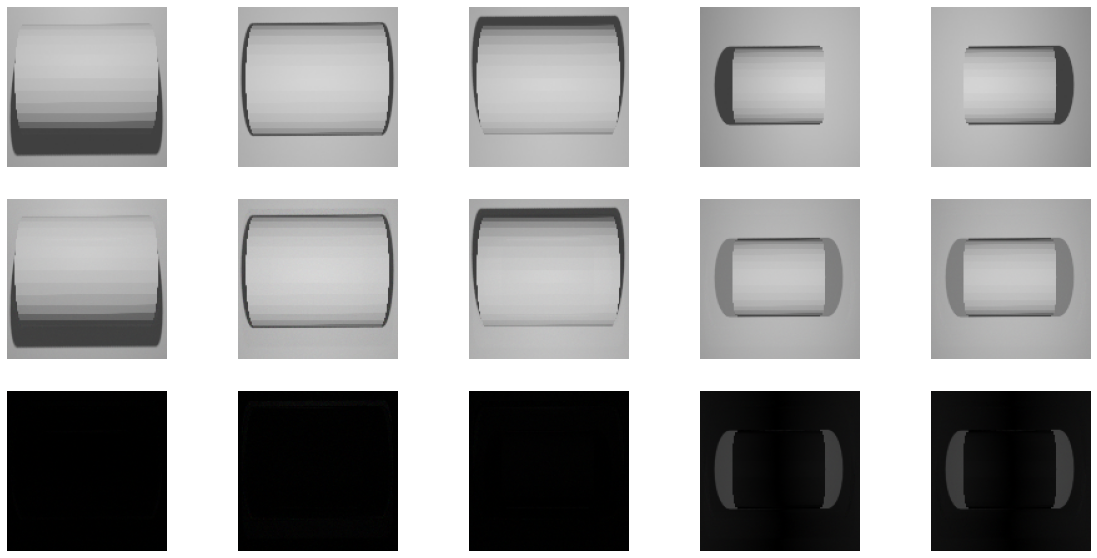

In [4]:
import tensorflow as tf
import numpy as np
from google.colab import drive
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive')

# Load the images
image_files = ['/content/drive/MyDrive/Colab Notebooks/data/mines/1.png', '/content/drive/MyDrive/Colab Notebooks/data/mines/2.png', '/content/drive/MyDrive/Colab Notebooks/data/mines/3.png', '/content/drive/MyDrive/Colab Notebooks/data/mines/4.png', '/content/drive/MyDrive/Colab Notebooks/data/mines/5.png']
images = []

for image_file in image_files:
  img = image.load_img(image_file, target_size=(128, 128))
  img = image.img_to_array(img)
  img = img / 255.0
  images.append(img)

images = np.array(images)

# Define the encoder architecture
encoder = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(128, 128, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu')
])

# Define the decoder architecture
decoder = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(32, )),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128 * 128 * 3, activation='sigmoid'),
    tf.keras.layers.Reshape((128, 128, 3))
])

# Combine the encoder and decoder into a single model
autoencoder = tf.keras.models.Sequential([encoder, decoder])

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(images, images, epochs=100, batch_size=32)


# Predict using the trained autoencoder
reconstructed_images = autoencoder.predict(images)

# Plot the original and reconstructed images
plt.figure(figsize=(20, 10))
for i in range(5):
     # Plot original image
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i])
    plt.axis('off')

    # Plot reconstructed image
    plt.subplot(3, 5, i + 6)
    plt.imshow(reconstructed_images[i])
    plt.axis('off')

    # Plot the difference between the original and reconstructed images
    plt.subplot(3, 5, i + 11)
    plt.imshow(np.abs(images[i] - reconstructed_images[i]))
    plt.axis('off')

plt.show()

